### 1- Handle Data

In [2]:
#load the data
import csv
with open('iris.data.txt', 'r') as csvfile:
    lines = csv.reader(csvfile)
    for row in lines :
        print (', '.join(row))

5.1, 3.5, 1.4, 0.2, Iris-setosa
4.9, 3.0, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.3, 0.2, Iris-setosa
4.6, 3.1, 1.5, 0.2, Iris-setosa
5.0, 3.6, 1.4, 0.2, Iris-setosa
5.4, 3.9, 1.7, 0.4, Iris-setosa
4.6, 3.4, 1.4, 0.3, Iris-setosa
5.0, 3.4, 1.5, 0.2, Iris-setosa
4.4, 2.9, 1.4, 0.2, Iris-setosa
4.9, 3.1, 1.5, 0.1, Iris-setosa
5.4, 3.7, 1.5, 0.2, Iris-setosa
4.8, 3.4, 1.6, 0.2, Iris-setosa
4.8, 3.0, 1.4, 0.1, Iris-setosa
4.3, 3.0, 1.1, 0.1, Iris-setosa
5.8, 4.0, 1.2, 0.2, Iris-setosa
5.7, 4.4, 1.5, 0.4, Iris-setosa
5.4, 3.9, 1.3, 0.4, Iris-setosa
5.1, 3.5, 1.4, 0.3, Iris-setosa
5.7, 3.8, 1.7, 0.3, Iris-setosa
5.1, 3.8, 1.5, 0.3, Iris-setosa
5.4, 3.4, 1.7, 0.2, Iris-setosa
5.1, 3.7, 1.5, 0.4, Iris-setosa
4.6, 3.6, 1.0, 0.2, Iris-setosa
5.1, 3.3, 1.7, 0.5, Iris-setosa
4.8, 3.4, 1.9, 0.2, Iris-setosa
5.0, 3.0, 1.6, 0.2, Iris-setosa
5.0, 3.4, 1.6, 0.4, Iris-setosa
5.2, 3.5, 1.5, 0.2, Iris-setosa
5.2, 3.4, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.6, 0.2, Iris-setosa
4.8, 3.1, 1.6, 0.2, Iris-setosa
5.4, 3.4

In [110]:
# Split the data 
import csv
import random
def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])

In [113]:
trainingSet=[]
testSet=[]
loadDataset('iris.data.txt', 0.66, trainingSet, testSet)
print ('Train: ' + repr(len(trainingSet)))
print ('Test: ' + repr(len(testSet)) )

Train: 101
Test: 48


In [114]:
101/(48+101)

0.6778523489932886

In [115]:
# The splitting proportion is APPROXIMATELY respected (67.7% --> 66%)

### 2- Similarity

In [198]:
import math
def euclideanDistance(instance1, instance2, length):
    ''' E.g:
    euclideanDistance( [2, 2, 2, 'a'],[4, 4, 4, 'b'],3) should return sqrt(12) 
    '''
    s=0             # s refers to a cumulative sum
    for i in range(length):
        sq_dif=(instance1[i]-instance2[i])**2     # sq_dif stands for squared difference
        s=s+sq_dif
    return math.sqrt(s)       

In [199]:
euclideanDistance( [2, 2, 2, 'a'],[4, 4, 4, 'b'],3)

3.4641016151377544

### 3- Neighbors

In [77]:
import operator
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
        distances.sort(key=operator.itemgetter(1))
    neighbors=[] 
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [79]:
trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]
testInstance = [5, 5, 5]
k=1
getNeighbors(trainSet, testInstance, k)

[[4, 4, 4, 'b']]

### 4- Response

In [142]:
import operator
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1] 
        if response in classVotes:
            classVotes[response]=classVotes[response]+1
        else:
            classVotes[response]=1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [143]:
neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
response = getResponse(neighbors)
print(response)

a


### 5- Accuracy

In [144]:
def getAccuracy(testSet, predictions):
    correct=0
    for i in range(len(predictions)):
        if testSet[i][-1]==predictions[i]:
            correct=correct+1
    return (correct/float(len(testSet))) * 100.0

In [145]:
testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
predictions = ['a', 'a', 'a']
getAccuracy(testSet, predictions)

66.66666666666666

### 6- Main function

In [163]:
def knn(filename,split,k):
    # Splitting the dataset 
    trainingSet=[]
    testSet=[]
    loadDataset(filename, split,trainingSet,testSet)
    # getting the neighbors of the testset
    accum_neighbors=[]
    for testInstance in testSet:
        neighbors=getNeighbors(trainingSet, testInstance[:-1], k)
        accum_neighbors.append(neighbors)
    # getting the list of predictions 
    predictions=[]
    for neighbors in accum_neighbors:
        response=getResponse(neighbors)
        predictions.append(response)
    # getting the accuracy
    accuracy=getAccuracy(testSet, predictions)
    return accuracy      

In [202]:
print('the accuracy of knn for the iris dataset is:',knn('iris.data.txt',0.75,20))

the accuracy of knn for the iris dataset is: 95.74468085106383


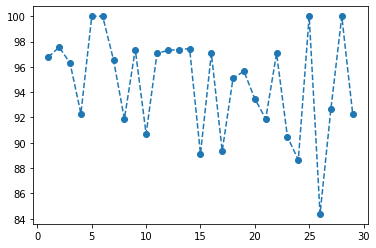

In [195]:
# We can optimize the value of k using the for loop . 
import matplotlib.pyplot as plt
scores=[]
for k in range(1,30):
    scores.append(round(knn('iris.data.txt',0.75,k),2))
plt.plot(range(1,30),scores,linestyle='dashed', marker='o')

In [196]:
# as this plot shows , 25 and 5 are the optimal values of K .

### 7- Another distance metric

The other distance metric chosen is the Manhattan distance 

In [200]:
def ManhattanDistance(instance1, instance2, length):
    s=0             # s refers to a cumulative sum
    for i in range(length):
        abs_dif=abs(instance1[i]-instance2[i])      # abs_dif stands for absolute difference
        s=s+abs_dif
    return s

In [201]:
ManhattanDistance( [2, 2, 2, 'a'],[4, 4, 4, 'b'],3)

6